<a href="https://colab.research.google.com/github/gu055805/MVP_An-liseDados/blob/main/MVP_AN%C3%81LISE_DADOS_e_BOAS_PR%C3%81TICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

**Nome:** Gustavo Barbieri  
**Matrícula:** 4052024001478  
**Dataset:** Wine Quality Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality)


# Descrição do Problema

O conjunto de dados Wine Quality é um conjunto de dados multivariado que consiste em medições físico-químicas de amostras de vinho tinto da região do Vale do Douro, em Portugal. O objetivo principal é prever a qualidade sensorial atribuída ao vinho (em uma escala de 0 a 10) com base em onze características químicas do produto, como acidez volátil, teor alcoólico, densidade, pH, entre outras.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Vinhos com maior teor alcoólico tendem a receber melhores notas?

- A acidez volátil elevada está associada a uma menor qualidade sensorial?

- Existem variáveis físico-químicas fortemente correlacionadas que influenciam o resultado final da qualidade?

## Tipo de Problema

Este é um problema de aprendizado supervisionado, pois o dataset possui uma variável-alvo conhecida (quality). Como essa variável é numérica e pode assumir diferentes valores dentro de um intervalo, trata-se de um problema de regressão.

## Seleção de Dados

O dataset Wine Quality é amplamente utilizado em estudos de aprendizado de máquina e está disponível no repositório público da UCI. Não foi necessário fazer uma seleção externa ou limpeza inicial, pois o dataset já está estruturado e pronto para uso.

## Atributos do Dataset

O dataset Wine Quality contém 1599 amostras de vinhos tintos, cada uma com informações físico-químicas medidas em laboratório. Possui 12 atributos:

***fixed acidity*** (acidez fixa)

***volatile acidity*** (acidez volátil)

***citric acid*** (ácido cítrico)

***residual sugar*** (açúcar residual)

***chlorides*** (cloretos)

***free sulfur dioxide*** (dióxido de enxofre livre)

***total sulfur dioxide*** (dióxido de enxofre total)

***density*** (densidade)

***pH***

***sulphates*** (sulfatos)

***alcohol*** (teor alcoólico)

***quality*** (nota de qualidade sensorial, de 0 a 10)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análise de Dados

A análise exploratória tem como objetivo investigar as principais características do dataset Wine Quality, observando a distribuição dos dados, possíveis outliers e relações entre os atributos. Esses insights são fundamentais para orientar decisões na preparação dos dados e no desenvolvimento de modelos preditivos.

## Total e Tipo das Instâncias

O dataset Wine Quality possui 1599 instâncias (observações), cada uma representando uma amostra de vinho tinto. Os 11 atributos físico-químicos são do tipo numérico (float), assim como a variável-alvo quality, que também é numérica e representa uma nota sensorial.

In [3]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
df.info()


Número de linhas: 1599
Número de colunas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
# Verificar a presença de valores nulos no dataset original
print("Total valor nulos no dataset Wine Quality:")
df.isnull().sum()

Total valor nulos no dataset Wine Quality:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


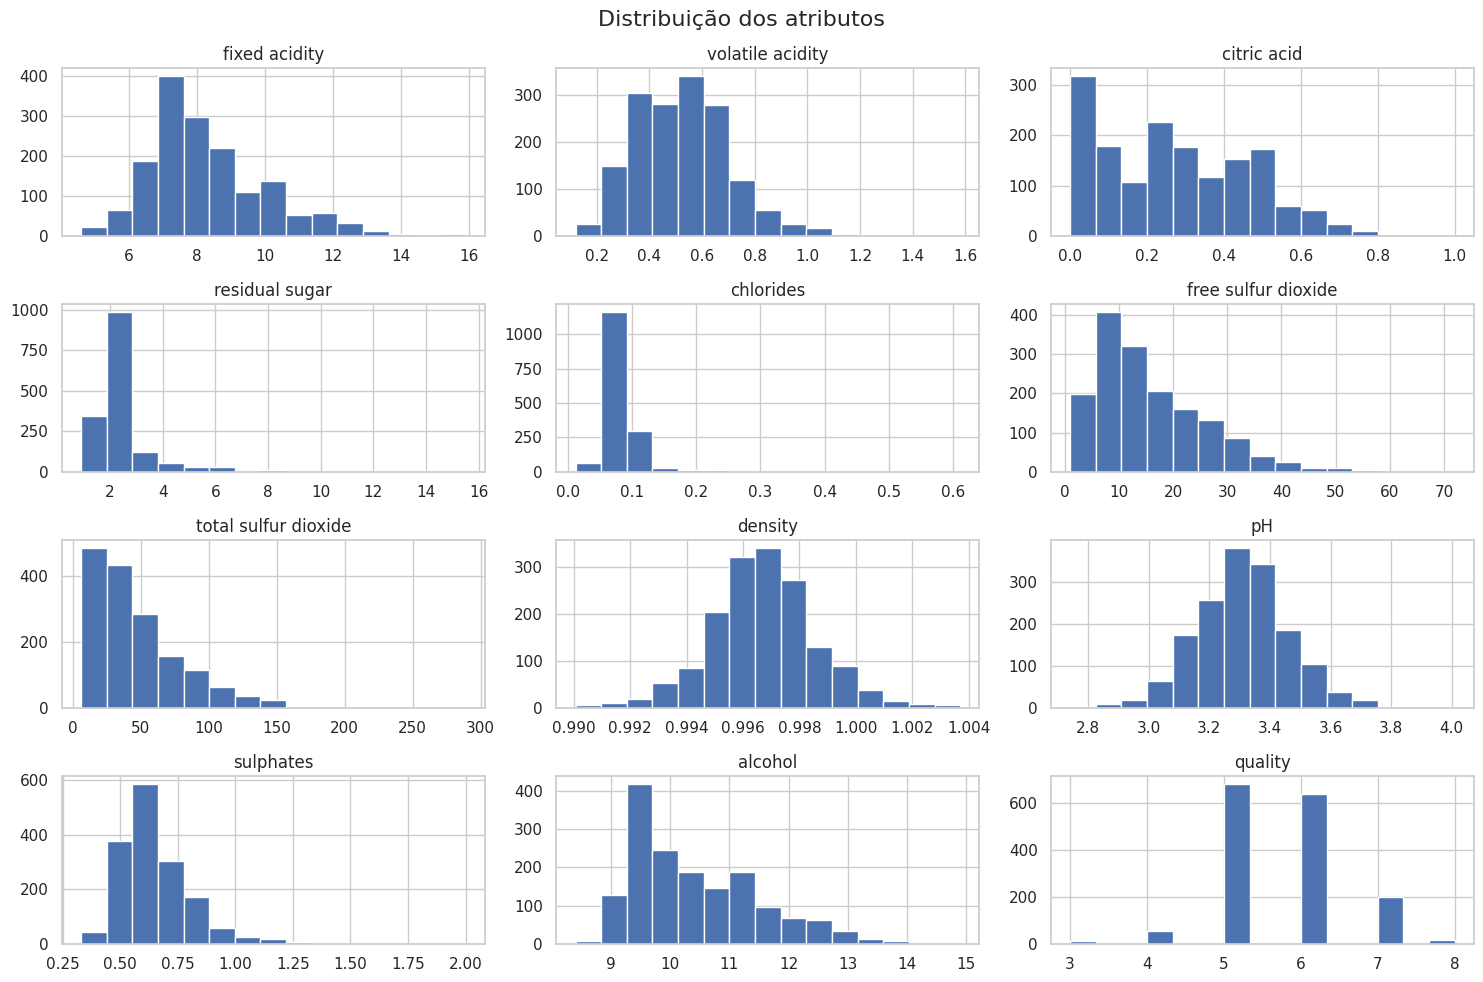

In [6]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribuição dos atributos", fontsize=16)
plt.tight_layout()
plt.show()


A análise dos histogramas revela que a maioria dos atributos apresenta distribuições assimétricas ou concentradas em intervalos específicos. Variáveis como residual sugar, free sulfur dioxide e total sulfur dioxide possuem caudas longas à direita, indicando a presença de valores extremos. Já atributos como density, pH e alcohol exibem distribuições mais próximas da normal.

A variável quality, que é a variável-alvo, apresenta uma concentração em torno das notas 5, 6 e 7. Esse comportamento sugere um desbalanceamento, com poucas amostras em notas muito baixas ou muito altas, o que pode influenciar a capacidade dos modelos preditivos de generalizar bem em toda a faixa de qualidade.

## Estatísticas Descritivas



In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [16]:
stats_mean = df.describe().loc['mean']
stats_std = df.describe().loc['std']

print(stats_mean)
print(stats_std)


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
Name: mean, dtype: float64
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
Name: std, dtype: float64


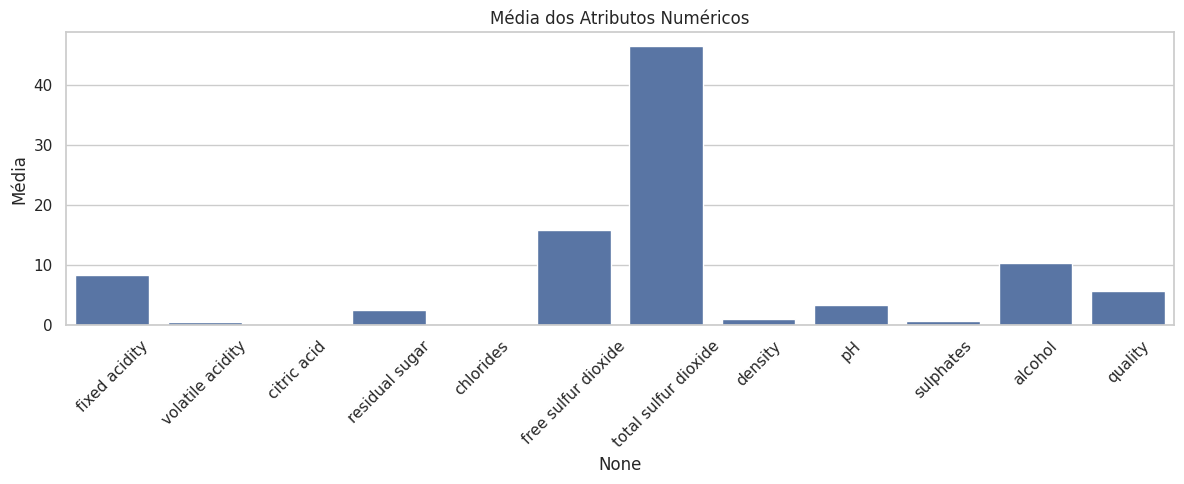

In [17]:
# Gráfico de barras da média dos atributos
plt.figure(figsize=(12, 5))
sns.barplot(x=stats_mean.index, y=stats_mean.values)
plt.title('Média dos Atributos Numéricos')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O gráfico mostra que os atributos possuem escalas bastante diferentes, com médias variando de valores muito pequenos (como chlorides) até valores mais altos (alcohol e total sulfur dioxide). Essa diferença pode impactar negativamente o desempenho de modelos que são sensíveis à escala dos dados, reforçando a importância do pré-processamento.

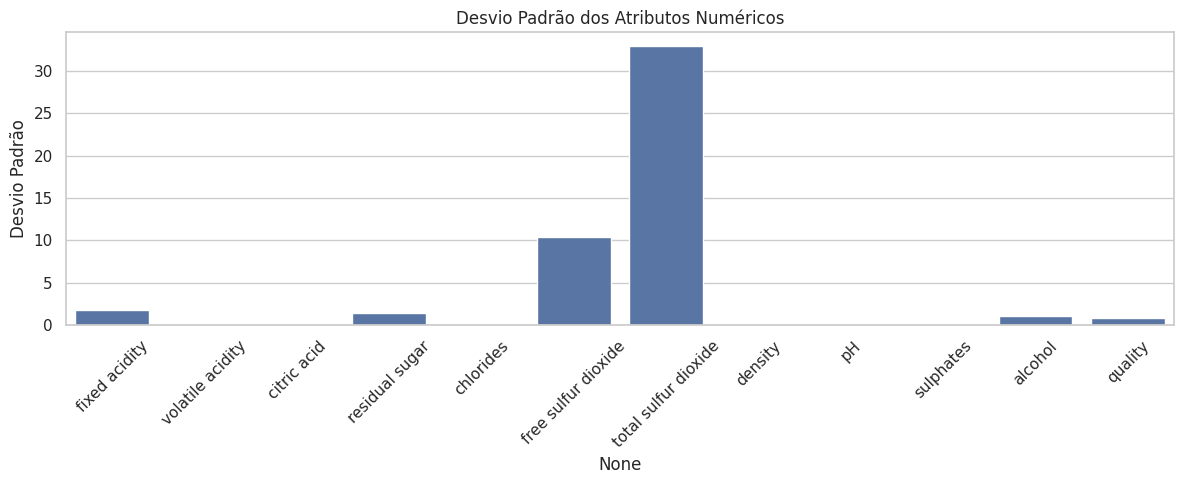

In [18]:
# Gráfico de barras do desvio padrão dos atributos
plt.figure(figsize=(12, 5))
sns.barplot(x=stats_std.index, y=stats_std.values)
plt.title('Desvio Padrão dos Atributos Numéricos')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O desvio padrão evidencia que algumas variáveis, como total sulfur dioxide e residual sugar, têm alta variabilidade, o que pode indicar a presença de outliers. Já variáveis como pH e density são mais estáveis.Essas diferenças justificam o uso de técnicas como normalização ou padronização antes de treinar um modelo de machine learning.

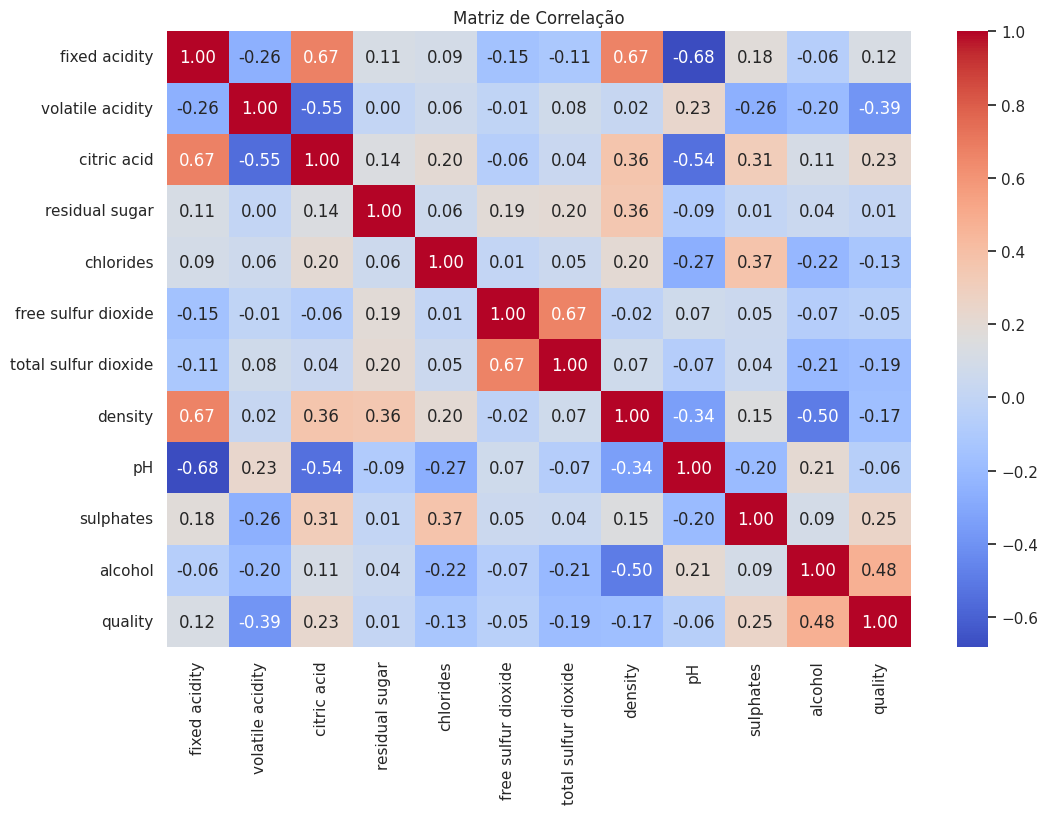

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


A matriz de correlação mostra que a variável alcohol tem a maior correlação positiva com a qualidade do vinho (quality), sugerindo que vinhos com maior teor alcoólico tendem a ser melhor avaliados. Já volatile acidity apresenta uma correlação negativa moderada, indicando que vinhos mais ácidos costumam ter menor qualidade. Além disso, density e pH também se destacam com correlações negativas

# Pré-Processamento de Dados

Vamos dividir em treino/teste

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Separar X e y
X = df.drop('quality', axis=1)
y = df['quality']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normalização

In [25]:
# 3. Normalizar com base no treino
scaler = MinMaxScaler()
scaler.fit(X_train)  # Aprende min e max do treino

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Aplica os mesmos min/max no teste

# Antes da normalização
print("Antes da normalização (X_train):")
print(X_train.head())

# Depois da normalização
print("\nDepois da normalização (X_train_normalized):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())



Antes da normalização (X_train):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
925             8.6              0.22         0.36             1.9      0.064   
363            12.5              0.46         0.63             2.0      0.071   
906             7.2              0.54         0.27             2.6      0.084   
426             6.4              0.67         0.08             2.1      0.045   
1251            7.5              0.58         0.14             2.2      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
925                  53.0                  77.0  0.99604  3.47       0.87   
363                   6.0                  15.0  0.99880  2.99       0.87   
906                  12.0                  78.0  0.99640  3.39       0.71   
426                  19.0                  48.0  0.99490  3.49       0.49   
1251                 27.0                  60.0  0.99630  3.28       0.59   

      alcohol  
9

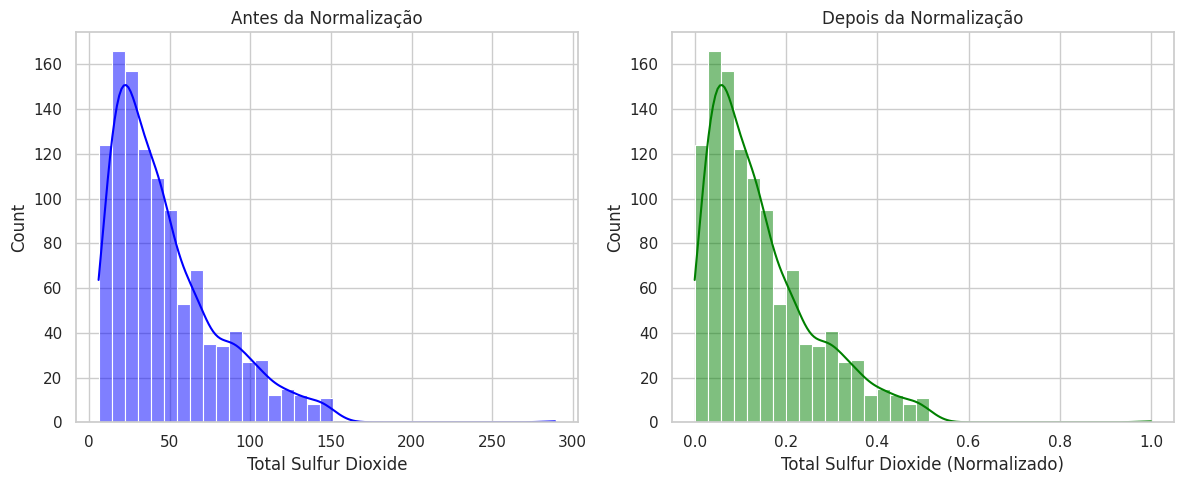

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Antes
plt.subplot(1, 2, 1)
sns.histplot(X_train['total sulfur dioxide'], kde=True, color='blue')
plt.title('Antes da Normalização')
plt.xlabel('Total Sulfur Dioxide')

# Depois
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, X_train.columns.get_loc('total sulfur dioxide')], kde=True, color='green')
plt.title('Depois da Normalização')
plt.xlabel('Total Sulfur Dioxide (Normalizado)')

plt.tight_layout()
plt.show()



A visualização comparativa mostra que a normalização via MinMaxScaler ajusta os dados para a faixa de 0 a 1, preservando o formato da distribuição original. Foi importante a normalização para tratar as diferenças de escalas entre as features para não 'sujar' o treinamento do modelo.

# Seleção de Atributos

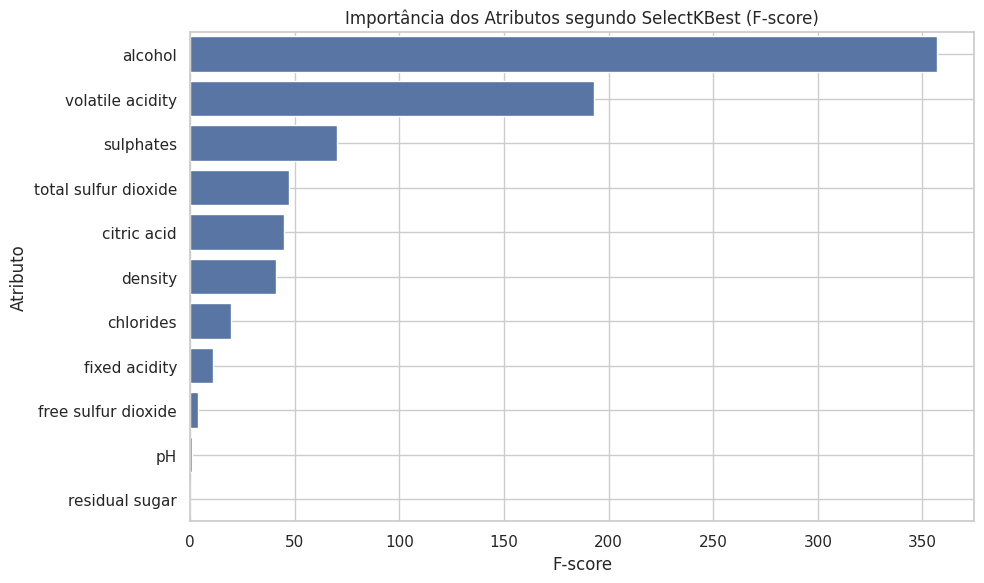

In [30]:


from sklearn.feature_selection import SelectKBest, f_regression

# Aplicar SelectKBest com f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_scaled, y_train)
scores = selector.scores_

# Criar DataFrame para visualização
feature_scores = pd.DataFrame({'Atributo': X.columns, 'Score F': scores})
feature_scores = feature_scores.sort_values(by='Score F', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores, x='Score F', y='Atributo')
plt.title('Importância dos Atributos segundo SelectKBest (F-score)')
plt.xlabel('F-score')
plt.ylabel('Atributo')
plt.tight_layout()
plt.grid(True)
plt.show()

Os atributos alcohol, volatile acidity e sulphates são os que mais se destacam na relação com a qualidade do vinho. Isso quer dizer que eles ajudam bastante o modelo a entender e prever se um vinho será bem avaliado ou não. Já os outros atributos têm menor influência e podem ser considerados menos importantes para o modelo.

# Conclusão
---

A análise e o pré-processamento do dataset de vinhos evidenciaram a importância de entender a estrutura dos dados antes de aplicar algoritmos de aprendizado de máquina. O conjunto de dados é limpo, composto apenas por variáveis numéricas, e apresenta uma boa base para testes preditivos com foco na qualidade do vinho.

A análise exploratória revelou a existência de assimetrias em algumas distribuições, além de correlações relevantes, como entre alcohol e quality. Técnicas de normalização foram aplicadas para adequar a escala dos dados, o que é especialmente útil em modelos sensíveis à magnitude dos atributos. Além disso, utilizamos o SelectKBest com F-score para avaliar a relevância das variáveis, permitindo selecionar automaticamente as mais importantes e filtrar aquelas com baixa contribuição.

As hipóteses iniciais também puderam ser investigadas:

Certos atributos impactam mais diretamente na qualidade do vinho?
Sim. Alcohol, volatile acidity e sulphates foram os que mais se destacaram como relevantes para prever a qualidade.

A normalização ajuda na preparação do modelo?
Sim. A normalização ajustou a escala dos dados sem alterar sua distribuição, tornando o treinamento mais estável.

Faz sentido aplicar redução de dimensionalidade?
Embora o número de atributos não seja alto, a seleção automática de variáveis com baixa relevância pode simplificar o modelo sem perda significativa de desempenho.

Com isso, o dataset está pronto para a próxima etapa: aplicação e comparação de modelos de machine learning para prever a qualidade dos vinhos com base em suas características físico-químicas.



## Próximos Passos:
---
- Aplicar modelos de regressão linear, árvore de decisão ou Random Forest para prever a variável `quality`.
- Explorar a possibilidade de transformar `quality` em categorias para abordar como um problema de classificação.
- Dividir o df em dois para treinar o modelo com todas as features e o outro com somente as features com os maiores f score.




# Requisitos

---

### 🔹 Análise de Dados

- **Quantos atributos e instâncias existem?**  
  12 colunas (11 atributos + 1 alvo), 1599 instâncias.

- **Quais são os tipos de dados dos atributos?**  
  Todos os atributos são numéricos (float64 ou int64).

- **Verifique as primeiras linhas do dataset. Algo chama a atenção?**  
  Os dados estão bem organizados, sem valores nulos. Algumas variáveis como `residual sugar` e `sulphates` mostram valores extremos.

- **Há valores faltantes, discrepantes ou inconsistentes?**  
  Não há valores nulos. Detectaram-se alguns outliers naturais em atributos como açúcar residual.

- **Faça um resumo estatístico. O que percebe?**  
  A maioria das variáveis tem distribuição assimétrica e escalas diferentes, justificando a normalização posterior.

- **Verifique a distribuição de cada atributo. O que percebe?**  
  As distribuições são variadas: algumas simétricas, outras com caudas longas (ex: `sulphates`, `chlorides`).  

- **Se for classificação, verifique a distribuição das classes.**  
  Não se aplica diretamente, pois `quality` é contínua. No entanto, observa-se concentração de notas entre 5 e 6.

- **Analise atributos combinados (correlação):**  
  `alcohol` tem correlação positiva com `quality`.  
  `volatile acidity` tem correlação negativa moderada com `quality`.

---

### 🔹 Pré-processamento

- **Quais operações de pré-processamento foram realizadas?**  
  - Verificação de valores nulos  
  - Normalização Min-Max nos atributos preditores  
  - Recriação do dataset normalizado

- **Justifique cada transformação realizada:**  
  A normalização foi aplicada para alinhar as escalas dos atributos antes da aplicação de modelos, pois variáveis como `alcohol` e `sulphates` tinham ordens de magnitude diferentes.

- **Valores nulos foram tratados?**  
  Não havia valores nulos a tratar.

- **Alguma nova análise foi feita após o pré-processamento?**  
  Sim, boxplots e análise visual pós-normalização indicam que a escala dos dados foi padronizada corretamente.

---